# Introduction

This is an overview and example of the "Cluster Pick Reccomendation System" or "CPR" as it will be reffered to in this guide. This will explain the modules of the system and the effective ways to use it on a dataset

Regular reccomendation systems rely on collaborative filtering and other multi-user datasets in order to make reccomendations, but this system is made for the last human on earth, or alternatively any case where there are many items but only a single user. This stragey combines clustering and a deconstructed version of supervised training in order to make a minimal subset that is likely to contain the "preferred" item of choice for the user.

First the data set is cleaned up. For every item, numerical features are normalized and categorical features are OH Encoded.
Then, the data is clustered, and items from each cluster are presented to the user. The user picks from the items presented a number of times. The information from those picks are then used to filter the data into a subset. The subset is then clustered and the cycle continues until a filtered subset is considered small enough to be presented to the user.

## -Example Latop Dataframe-

An Example of a dataframe you would want to run CPR
the data 

dataframes are used for all multi-dimensional data in the system

In [1]:
import pandas as pd
import numpy as np

If there are no size limitation issues, keep a copy of the dataframe for both comparisons and facilitating picks

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/JoseACortes/loose-data/main/laptops.csv')
df = df.drop(columns=['0'])
#unchanged data for comparison
dfo = df.copy()
dfo

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


# Preperation

this section takes data and prepares it for CPR

## -BaseExtra-

this module includes basic items used in preperation

!pip3 install numpy
!pip3 install pandas

In [2]:
import random
import numpy as np
import pandas as pd

In [3]:
test = np.array([2, 3])
np.array(test)

array([2, 3])

In [18]:
#check if an item is in a dataframe
def testcheck(x, vset):
    x = np.array(x)
    if type(pd.DataFrame()) == pd.core.frame.DataFrame
        for v in vset.values:
            if np.equal(x, v).all().all():
                return True
    return False

In [ ]:
def closestvector(target, A):
    newv = [np.linalg.norm(np.array(np.array(target)-np.array(a))) for a in A]
    return np.argmin(newv)

In [2]:
def farthestvector(target, A):
    newv = [np.linalg.norm(np.array(np.array(target)-np.array(a))) for a in A]
    return np.argmax(newv)

In [ ]:
def move(x, a, v):
    n = abs(x-a)*v
    if a>x:
        return x+n
    elif a<x:
        return x-n
    else:
        return x

In [ ]:
def multimove(X, A, v):
    newvec = list()
    for n, x in enumerate(X):
        newvec.append(move(x, A[n], v))
    return newvec

## -DataPrepBase-

this is for preparing data

In [ ]:
def crush(vector):
    return [(v)/max(vector) for v in vector]

In [ ]:
def reduce(vector):
    return (np.array(vector)/np.sum(vector)).tolist()

## -Prep-

this is for preperation and as a branch to the other prep modules

import DataPrepBase
from sklearn import preprocessing
import pandas as pd

In [3]:
from sklearn import preprocessing

In [4]:
def scale(dataset, col_list):
    newset = dataset
    for i in col_list:
        newset[i] = preprocessing.minmax_scale(newset[i])
    return newset

# Preperation Example

The first thing you need to do when preparing data is cleaning the dataframe

Numerical variables in text form need to be converted to neumerical values and later all numerical values need to be normalized

For the ram, that only contains 'GB' outside of the numerical value, the conversion is simple

same as the "Wheight" column

In [5]:
print(dfo.Ram.unique())

['8GB' '16GB' '4GB' '2GB' '12GB' '6GB' '32GB' '24GB' '64GB']


In [6]:
print(dfo.Weight.unique())

['1.37kg' '1.34kg' '1.86kg' '1.83kg' '2.1kg' '2.04kg' '1.3kg' '1.6kg'
 '2.2kg' '0.92kg' '1.22kg' '0.98kg' '2.5kg' '1.62kg' '1.91kg' '2.3kg'
 '1.35kg' '1.88kg' '1.89kg' '1.65kg' '2.71kg' '1.2kg' '1.44kg' '2.8kg'
 '2kg' '2.65kg' '2.77kg' '3.2kg' '0.69kg' '1.49kg' '2.4kg' '2.13kg'
 '2.43kg' '1.7kg' '1.4kg' '1.8kg' '1.9kg' '3kg' '1.252kg' '2.7kg' '2.02kg'
 '1.63kg' '1.96kg' '1.21kg' '2.45kg' '1.25kg' '1.5kg' '2.62kg' '1.38kg'
 '1.58kg' '1.85kg' '1.23kg' '1.26kg' '2.16kg' '2.36kg' '2.05kg' '1.32kg'
 '1.75kg' '0.97kg' '2.9kg' '2.56kg' '1.48kg' '1.74kg' '1.1kg' '1.56kg'
 '2.03kg' '1.05kg' '4.4kg' '1.90kg' '1.29kg' '2.0kg' '1.95kg' '2.06kg'
 '1.12kg' '1.42kg' '3.49kg' '3.35kg' '2.23kg' '4.42kg' '2.69kg' '2.37kg'
 '4.7kg' '3.6kg' '2.08kg' '4.3kg' '1.68kg' '1.41kg' '4.14kg' '2.18kg'
 '2.24kg' '2.67kg' '2.14kg' '1.36kg' '2.25kg' '2.15kg' '2.19kg' '2.54kg'
 '3.42kg' '1.28kg' '2.33kg' '1.45kg' '2.79kg' '1.84kg' '2.6kg' '2.26kg'
 '3.25kg' '1.59kg' '1.13kg' '1.78kg' '1.10kg' '1.15kg' '1.27kg' '1.43kg

In [5]:
df['Ram'] = [int(i.replace('GB', '')) for i in dfo['Ram']]

In [6]:
df['Weight'] = [float(i.replace('kg', '')) for i in dfo['Weight']]

For the cpu, 

In [7]:
dfo['Cpu']

0                       Intel Core i5 2.3GHz
1                       Intel Core i5 1.8GHz
2                 Intel Core i5 7200U 2.5GHz
3                       Intel Core i7 2.7GHz
4                       Intel Core i5 3.1GHz
                        ...                 
1298              Intel Core i7 6500U 2.5GHz
1299              Intel Core i7 6500U 2.5GHz
1300    Intel Celeron Dual Core N3050 1.6GHz
1301              Intel Core i7 6500U 2.5GHz
1302    Intel Celeron Dual Core N3050 1.6GHz
Name: Cpu, Length: 1303, dtype: object

Although ARM chips very recently showed that gigahertz is not a perfect metric of computing, this transformation will extract it from the list. Ideally, I would try to connect this data to a standard test such as "CPU UserBenchmark"

In [8]:
df['Cpu'] = [float(i.replace('GHz', '')) for i in [i[i.rindex(' ')+1:] for i in dfo['Cpu']]]

The memory data is stored in a very tricky manner, containing both the storage size and type as so:

In [37]:
dfo.Memory.unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [31]:
for i in dfo.Memory.unique():
    if '+' in i:
        print(i)

128GB SSD +  1TB HDD
256GB SSD +  256GB SSD
256GB SSD +  1TB HDD
256GB SSD +  2TB HDD
512GB SSD +  1TB HDD
256GB SSD +  500GB HDD
128GB SSD +  2TB HDD
512GB SSD +  512GB SSD
512GB SSD +  256GB SSD
512GB SSD +  2TB HDD
64GB Flash Storage +  1TB HDD
1TB HDD +  1TB HDD
1TB SSD +  1TB HDD
512GB SSD +  1.0TB Hybrid
256GB SSD +  1.0TB Hybrid


we'll restructure the data this way according to my own knowledge:  
0: HDD  
1: Hybrid  
2: SSD+Hybrid  
3: SSD+HDD  
4: SSD  
5: Flash Storage  

For this we hard encode in two new columns:

In [9]:
def memoryTranslate(st):
    if '8' in st:
        return 8
    elif '16' in st:
        return 16
    elif '32' in st:
        return 32
    elif '64' in st:
        return 64
    elif '180' in st:
        return 180
    elif '128' in st:
        return 128
    elif '240' in st:
        return 140
    elif '256' in st:
        return 256
    elif '500' in st:
        return 500
    elif '508' in st:
        return 508
    elif '512' in st:
        return 512
    elif '1' in st:
        return 1000
    elif '2' in st:
        return 2000

In [10]:
memorysize = []
memorytype = []
#type
for i in dfo['Memory']:
    if ('SSD' in i) and ('HDD' in i):
        memorytype.append(3)
    elif ('SSD' in i) and ('Hybrid' in i):
        memorytype.append(2)
    elif 'HDD' in i:
        memorytype.append(0)
    elif 'Hybrid' in i:
        memorytype.append(1)
    elif 'SSD' in i:
        memorytype.append(4)
    elif 'Flash Storage' in i:
        memorytype.append(5)
for i in dfo['Memory']:
    if '+' in i:
        memorysize.append(memoryTranslate(i[0:i.index('+')])+memoryTranslate(i[i.index('+'):]))
    else:
        memorysize.append(memoryTranslate(i))
df['MemorySize'] = memorysize
df['MemoryType'] = memorytype

In [13]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,MemorySize,MemoryType
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,2.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,8,4
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,1.8,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,8,5
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,2.5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,256,4
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,2.7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,512,4
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,3.1,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,256,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,2.5,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.00,8,4
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,2.5,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.00,512,4
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,1.6,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.00,64,5
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,2.5,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.00,1000,0


Standardization of datasets is a common requirement for many machine learning estimators, so for a numerical list such as:

In [12]:
df['Inches']

0       13.3
1       13.3
2       15.6
3       15.4
4       13.3
        ... 
1298    14.0
1299    13.3
1300    14.0
1301    15.6
1302    15.6
Name: Inches, Length: 1303, dtype: float64

In [33]:
import matplotlib.pyplot as plt

(array([  4.,  34.,  50., 166., 210.,   4., 669.,   0., 165.,   1.]),
 array([10.1 , 10.93, 11.76, 12.59, 13.42, 14.25, 15.08, 15.91, 16.74,
        17.57, 18.4 ]),
 <BarContainer object of 10 artists>)

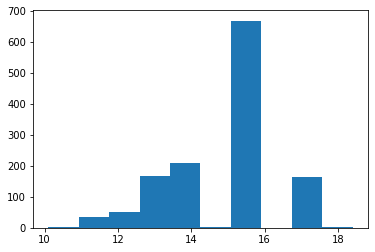

In [93]:
plt.hist(dfo['Inches'])

(array([  4.,  34.,  50., 166., 210.,   4., 669.,   0., 165.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

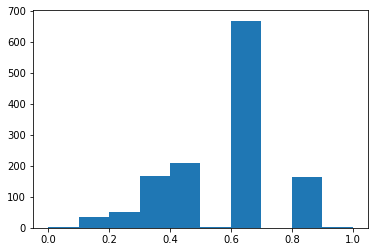

In [94]:
plt.hist(preprocessing.minmax_scale(dfo['Inches']))

In [97]:
scale(df, ['Inches', 'Price_euros', 'Ram', 'Weight'])

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,0.385542,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,0.096774,128GB SSD,Intel Iris Plus Graphics 640,macOS,0.169576,0.196741
1,Apple,Macbook Air,Ultrabook,0.385542,1440x900,Intel Core i5 1.8GHz,0.096774,128GB Flash Storage,Intel HD Graphics 6000,macOS,0.162095,0.122353
2,HP,250 G6,Notebook,0.662651,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,0.096774,256GB SSD,Intel HD Graphics 620,No OS,0.291771,0.067679
3,Apple,MacBook Pro,Ultrabook,0.638554,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,0.225806,512GB SSD,AMD Radeon Pro 455,macOS,0.284289,0.398895
4,Apple,MacBook Pro,Ultrabook,0.385542,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,0.096774,256GB SSD,Intel Iris Plus Graphics 650,macOS,0.169576,0.275038
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,0.469880,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,0.032258,128GB SSD,Intel HD Graphics 520,Windows 10,0.276808,0.078312
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,0.385542,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,0.225806,512GB SSD,Intel HD Graphics 520,Windows 10,0.152120,0.223629
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,0.469880,1366x768,Intel Celeron Dual Core N3050 1.6GHz,0.000000,64GB Flash Storage,Intel HD Graphics,Windows 10,0.201995,0.009283
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,0.662651,1366x768,Intel Core i7 6500U 2.5GHz,0.064516,1TB HDD,AMD Radeon R5 M330,Windows 10,0.374065,0.099578


In [107]:
dfo.ScreenResolution.unique()

array(['IPS Panel Retina Display 2560x1600', '1440x900',
       'Full HD 1920x1080', 'IPS Panel Retina Display 2880x1800',
       '1366x768', 'IPS Panel Full HD 1920x1080',
       'IPS Panel Retina Display 2304x1440',
       'IPS Panel Full HD / Touchscreen 1920x1080',
       'Full HD / Touchscreen 1920x1080',
       'Touchscreen / Quad HD+ 3200x1800',
       'IPS Panel Touchscreen 1920x1200', 'Touchscreen 2256x1504',
       'Quad HD+ / Touchscreen 3200x1800', 'IPS Panel 1366x768',
       'IPS Panel 4K Ultra HD / Touchscreen 3840x2160',
       'IPS Panel Full HD 2160x1440',
       '4K Ultra HD / Touchscreen 3840x2160', 'Touchscreen 2560x1440',
       '1600x900', 'IPS Panel 4K Ultra HD 3840x2160',
       '4K Ultra HD 3840x2160', 'Touchscreen 1366x768',
       'IPS Panel Full HD 1366x768', 'IPS Panel 2560x1440',
       'IPS Panel Full HD 2560x1440',
       'IPS Panel Retina Display 2736x1824', 'Touchscreen 2400x1600',
       '2560x1440', 'IPS Panel Quad HD+ 2560x1440',
       'IPS Panel 

# Excecution

this section takes the data and trains the cpr model

## -Filter-

This module filters the dataset given decisions

In [ ]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
def hardFilterFunction(cluster_function, pick, data_set):
    check = cluster_function.predict([pick])
    return data_set[cluster_function.predict(data_set)==check]

In [ ]:
def nearestFilterFunction(pick, data_set, cut = .50):
    cutt = int(round(len(data_set)*cut, 0))
    neigh = NearestNeighbors(n_neighbors=cutt)
    neigh.fit(data_set)
    return data_set.iloc[neigh.kneighbors([pick], cutt, return_distance=False)[0].tolist()]

## -Decision-

this module takes decisions and uses it to train a prediction module

In [10]:
import random

In [ ]:
def SimpleAveragePick(sets, cycles, target = 0):
    picklist = list()
    for c in range(cycles):
        frm = [sets[n].iloc[a] for n, a in enumerate([random.randint(1,len(s)-1) for s in sets])]
        for n, f in enumerate(frm):
            print('---Choice '+str(n)+'---')
            print(f)
        pick = frm[int(input('Pick From Choices: '))]
        picklist.append(pick)
    return np.average(picklist, axis=0)

## -SimBot-

this module simulates decisions based on a predetermined expected result

In [11]:
def SimpleAveragePick(target, sets, cycles):
    picklist = list()
    for c in range(cycles):
        frm = [sets[n].iloc[a] for n, a in enumerate([random.randint(1,len(s)-1) for s in sets])]
        pick = frm[BaseExtra.closestvector(target, frm)]
        picklist.append(pick)
    return np.average(picklist, axis=0)

In [12]:
def TriangleMove(target, sets, cycles):
    picklist = list()
    start = np.average([np.average(s, axis=0) for s in sets], axis=0)
    for c in range(cycles):
        frm = [sets[n].iloc[a] for n, a in enumerate([random.randint(1,len(s)-1) for s in sets])]
        close = frm[BaseExtra.closestvector(target, frm)]
        far = frm[BaseExtra.farthestvector(target, frm)]
        b = np.linalg.norm(np.array(far-close))/(np.linalg.norm(np.array(start-close))+np.linalg.norm(np.array(start-far)))
        start = np.array(BaseExtra.multimove(start, close, b))
    return start

## -Run-

this module runs Cluster Choice Filtering

In [18]:
def dataFilter(filter_function, pick, data_set, cluster_function = 0, cut = 0.50):
    if filter_function == None:
        raise Exception('Pick a data filter! available filters: hard, nearest')
    elif filter_function == 'hard':
        return Filter.hardFilterFunction(cluster_function, pick, data_set)
    elif filter_function == 'nearest':
        return Filter.nearestFilterFunction(pick, data_set, cut)

In [ ]:
def decisionFunction(decision_function):
    if decision_function == None:
        raise Exception('Pick a decision function!')

In [ ]:
def clusterChoiceFiltering(data_set,
                           cycles_per_epoch=10,
                           max_epochs=10,
                           decision_function='simpleAveragePick',
                           cluster_function='kMeans',
                           filter_function='nearset',
                           n_clusters=3,
                           minimum_cluster_size=10,
                           maximum_cluster_size=40,
                           target_array=None
                          ):
    decision_function = decisionFunction

In [ ]:
def clusterChoiceFiltering(data_set,
                           decision_function, 
                           cluster_function, 
                           filter_function='nearest', 
                           max_epochs, 
                           cycles_per_epoch = 0, 
                           target_array = 0, 
                           n_clusters=2, 
                           minimum_cluster_size=10, 
                           maximum_cluster_size=40
                          ):
    curset = data_set
    cfunc = cluster_function(n_clusters = n_clusters)
    cfunc.fit(curset)
    echeck = 0
    for e in range(max_epochs):
        if len(curset)<maximum_cluster_size:
            return curset, echeck
        else:
            if len(curset)>= n_clusters:
                if min([len(curset[cfunc.predict(curset)==n]) for n in range(0, n_clusters)])<3:
                    pass
                else:
                    if len(curset)<maximum_cluster_size:
                        pass
                    else:
                        echeck+=1
                        o = decision_function(target = target_array, sets = [curset[cfunc.predict(curset)==n] for n in range(0, n_clusters)], cycles = cycles_per_epoch)
                        curset = dataFilter(filter_function = filter_function, cluster_function=cfunc, pick = o, data_set = curset)
                        lastcurset = curset
                        try:
                            cfunc.fit(curset)
                        except:
                            return curset, echeck
                        if len(curset)<minimum_cluster_size:
                            return lastcurset, echeck
    return curset, echeck

## -DeepRun-

this module goes through all possible results with simbot

In [ ]:
import progressbar

In [ ]:
def clusterChoiceFiltering(decision_functions, 
    data_set, 
    cluster_function_list, 
    filter_function_list, 
    max_epochs, 
    cycles_per_epoch_list, 
    n_clusters_list, 
    minimum_cluster_size=10, 
    maximum_cluster_size=40,
    showprogress = True):
    check = list()
    step = 0
    with progressbar.ProgressBar(max_value=(len(data_set)*len(decision_functions)*len(cluster_function_list)*len(filter_function_list)*len(n_clusters_list)*len(cycles_per_epoch_list))) as bar:
        for dfun in decision_functions:
            for cfun in cluster_function_list:
                for ffun in filter_function_list:
                    for nclu in n_clusters_list:
                        for ccyc in cycles_per_epoch_list:
                            print([dfun, cfun, ffun, nclu, ccyc])
                            for g in range(0,len(data_set)):
                                if showprogress==True:
                                    step+=1
                                    bar.update(step)
                                clust = Run.clusterChoiceFiltering(decision_function = dfun,
                                    data_set = data_set, 
                                    target_array = data_set[g:g+1], 
                                    cluster_function = cfun, 
                                    filter_function = ffun, 
                                    max_epochs = max_epochs, 
                                    cycles_per_epoch = ccyc, 
                                    n_clusters = nclu, 
                                    minimum_cluster_size = minimum_cluster_size,
                                    maximum_cluster_size = maximum_cluster_size)
                                check.append([str(dfun), str(cfun), str(ffun), str(nclu), str(ccyc), data_set[g:g+1], clust[1], clust[0]])
    return pd.DataFrame(check, columns=['Decision_Function', 'Cluster_Function', 'Filter', 'N_Clusters', 'Cycles', 'Item', 'Epochs', 'Cluster'])

# Diagnostics

this section takes the cpr model and runs diagnosis on it

## -Graph-

this module makes a 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def alternatespace(x, y):
    group = list()
    for a in range(y):
        for b in range(x):
            group.append([b, a])
    return group

In [8]:
def multiclustgraph(dataset, size=50):
    a = len(dataset.columns)
    fig, axs = plt.subplots(a, a, figsize=(size, size))
    for c, t in enumerate(alternatespace(a, a)):
        if t[0] == t[1]:
            axs[t[0]][t[1]].hist(dataset[dataset.columns[[t[0]]]], color ='tab:blue', histtype = 'step', bins=100)
            axs[t[0]][t[1]].title.set_text(dataset.columns[t[0]]+' vs. '+dataset.columns[t[1]])
        else:
            if t[0]>t[1]:
                axs[t[0]][t[1]].scatter(dataset[dataset.columns[[t[0]]]],dataset[dataset.columns[t[1]]], color ='tab:blue')
                axs[t[0]][t[1]].title.set_text(dataset.columns[t[0]]+' vs. '+dataset.columns[t[1]])
                axs[t[0]][t[1]].set_xlabel(dataset.columns[t[0]])
                axs[t[0]][t[1]].set_ylabel(dataset.columns[t[1]])
            if t[0]<t[1]:
                axs[t[0]][t[1]].scatter(dataset[dataset.columns[[t[0]]]],dataset[dataset.columns[t[1]]], color ='tab:orange')
                axs[t[0]][t[1]].title.set_text(dataset.columns[t[0]]+' vs. '+dataset.columns[t[1]])
                axs[t[0]][t[1]].set_xlabel(dataset.columns[t[0]])
                axs[t[0]][t[1]].set_ylabel(dataset.columns[t[1]])
    fig.show()


[3, 3, 1, 3, 2]

In [ ]:
def diagnosePlot(frame, columns):
    for c in columns:
        m = list(range(1, max(frame[c])+2))
        plt.figure(figsize=(8, 6))
        plt.title('Distribution of Total '+c, fontsize=20)
        plt.xticks(m)
        plt.xlabel('Total '+c)
        plt.hist(frame[frame['Sucessful']==True][c], bins = m, align = 'left', stacked=True, label='Sucessful Test', color = 'blue')
        plt.hist(frame[frame['Sucessful']==False][c], bins = m, align = 'left', stacked=True, label='Un-Sucessful Test', color = 'orange')
        plt.legend()
        plt.text(0, -20, 'Minimum '+c+': '+str(np.min(frame[c]))+' | Average '+c+': '+str(round(np.average(frame[c]), 1))+' | Maximum '+c+': '+str(np.max(frame[c])), fontsize=15)
        plt.text(0, -40, 'Average '+c+': '+str(round(np.average(frame[c]), 1)), fontsize=15)
        plt.text(0, -60, 'Maximum '+c+': '+str(np.max(frame[c])), fontsize=15)
        plt.show()

## -Diagnose-

this checks the results of a deep run

In [ ]:
def deepVitals(DeepFull):
    check = list()
    for d in range(len(DeepFull)):
        check.append([BaseExtra.testcheck(DeepFull[d:d+1]['Item'].iloc[0], DeepFull[d:d+1]['Cluster'].iloc[0]), DeepFull[d:d+1]['Epochs'].iloc[0], len(DeepFull[d:d+1]['Cluster'].iloc[0])])
    checkframe = pd.DataFrame(check, columns=['Sucessful', 'Epochs', 'Cluster_Size'])
    Graph.diagnosePlot(checkframe, ['Epochs', 'Cluster_Size'])
    print(str(len(checkframe[checkframe['Sucessful']==True]))+' Sucessful out of '+str(len(checkframe))+" ("+str(round(len(checkframe[checkframe['Sucessful']==True])/len(checkframe), 3))+")")
    return checkframe